![Growdev](https://www.growdev.com.br/assets/images/logo_growdev.png)

![Formação Engenharia de Dados](https://d335luupugsy2.cloudfront.net/cms/files/524558/1707226566/$occu5m8t1op)

Este material tem como objetivo incentivar a prática dos conteúdos estudados até o momento, e a pesquisa. Tenha em consideração que o exercício foi pensado para incentivar a prática dos conteúdos estudados até então, porém aprender a pesquisar faz parte do processo de aprendizagem.

Fique tranquilo, faça os exercícios com calma, e boa prática!


#Orientações:

 - Faça uma copia deste arquivo
 - Após concluir os exercicios, suba seu exercicio para o GitHub e compartilhe o link no **google** Classroom


#Exercícios pandas e plot

As questões a seguir utilizam como base o dataset de venda de jogos eletrônicos disponível no seguinte [link.](https://www.kaggle.com/code/rafa84miranda/vendas-de-jogos-de-videogames/data?select=vgsales.csv)

Os campos são:
- Rank: posição no ranking de vendas
- Name: nome do jogo
- Platform: plataforma/console
- Year: ano de lançamento
- Genre: gênero
- Publisher: empresa que publicou o jogo
- NA_Sales: vendas na américa do norte (em milhões de dólares)
- EU_Sales: vendas na europa (em milhões de dólares)
- JP_Sales: vendas no japão (em milhões de dólares)
- Other_Sales: outras vendas (em milhões de dólares)
- Global_Sales: vendas globais (em milhões de dólares)


Qual foi o jogo mais vendido no mundo em 2010?



In [2]:
import pandas as pd

dados = pd.read_csv('vgsales.csv')
#display(dados)
dados_2010 = dados[dados['Year'] == 2010]
#display(dados_2010)

dados_2010_ordenado = dados_2010.sort_values(by='Global_Sales', ascending=False)
jogo_mais_vendido_2010 = dados_2010_ordenado.head(1)

display(jogo_mais_vendido_2010[['Name', 'Platform', 'Global_Sales']])

,Name,Platform,Global_Sales
11183,Kinect Adventures!,X360,21.82


Qual foi a empresa que mais vendeu de 2005 até 2016 - Construa um gráfico de barras para apresentar


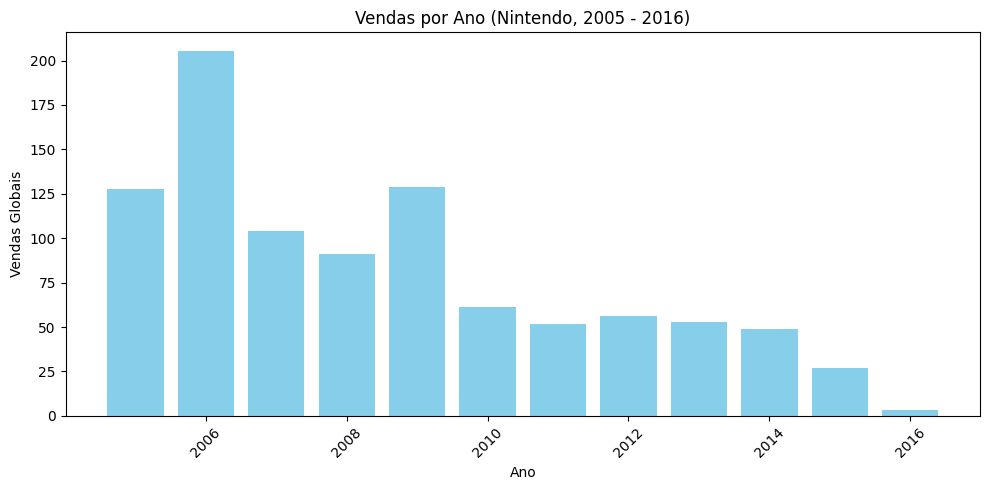

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


dados = pd.read_csv('vgsales.csv')
#display(dados)
dados_filtrados = dados[(dados['Year'] >= 2005) & (dados['Year'] <= 2016)]
vendas_por_empresa = dados_filtrados.groupby('Publisher')['Global_Sales'].sum().reset_index()

# empresa que mais vendeu
empresa_top = vendas_por_empresa.sort_values(by='Global_Sales', ascending=False).iloc[0]
dados_empresa_top = dados_filtrados[dados_filtrados['Publisher'] == empresa_top['Publisher']]

# Agrupar os dados
vendas_por_ano_empresa_top = dados_empresa_top.groupby('Year')['Global_Sales'].sum().reset_index()

# monta o o gráfico 
plt.figure(figsize=(10, 5))
plt.bar(vendas_por_ano_empresa_top['Year'], vendas_por_ano_empresa_top['Global_Sales'], color='skyblue')
plt.xlabel('Ano')
plt.ylabel('Vendas Globais')
plt.title(f'Vendas por Ano ({empresa_top["Publisher"]}, 2005 - 2016)')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

#print(vendas_por_ano_empresa_top)

Qual o nome do jogo que menos foi vendido em 2008 do gênero Sports.


In [4]:
import pandas as pd

dados = pd.read_csv('vgsales.csv')
dados_2008_sports = dados[(dados['Year'] == 2008) & (dados['Genre'] == 'Sports')]
jogo_menos_vendido_2008_sports = dados_2008_sports.loc[dados_2008_sports['Global_Sales'].idxmin()]

print(jogo_menos_vendido_2008_sports[['Name', 'Global_Sales']])

Name            Winning Post 7 Maximum 2008
Global_Sales                           0.01
Name: 9691, dtype: object


Qual o percentual relacionado às vendas globais de jogos de Wii (excluindo-se América do norte, japão e europa) de 2006 até 2010?





In [5]:
import pandas as pd

dados = pd.read_csv('vgsales.csv')

#Filtra entre 2006 e 2010
dados_wii_2006_2010 = dados[(dados['Platform'] == 'Wii') & (dados['Year'] >= 2006) & (dados['Year'] <= 2010)]
vendas_globais = dados_wii_2006_2010['Global_Sales'].sum()
vendas_outros = dados_wii_2006_2010['Other_Sales'].sum()

percentual_outros = (vendas_outros / vendas_globais) * 100
print(f"Percentual de vendas globais de jogos de Wii (excluindo-se América do Norte, Japão e Europa) de 2006 até 2010: {percentual_outros:.2f}%")

Percentual de vendas globais de jogos de Wii (excluindo-se América do Norte, Japão e Europa) de 2006 até 2010: 8.75%


Mostre um gráfico de linhas com as vendas em diferentes plataformas ao longo dos anos.


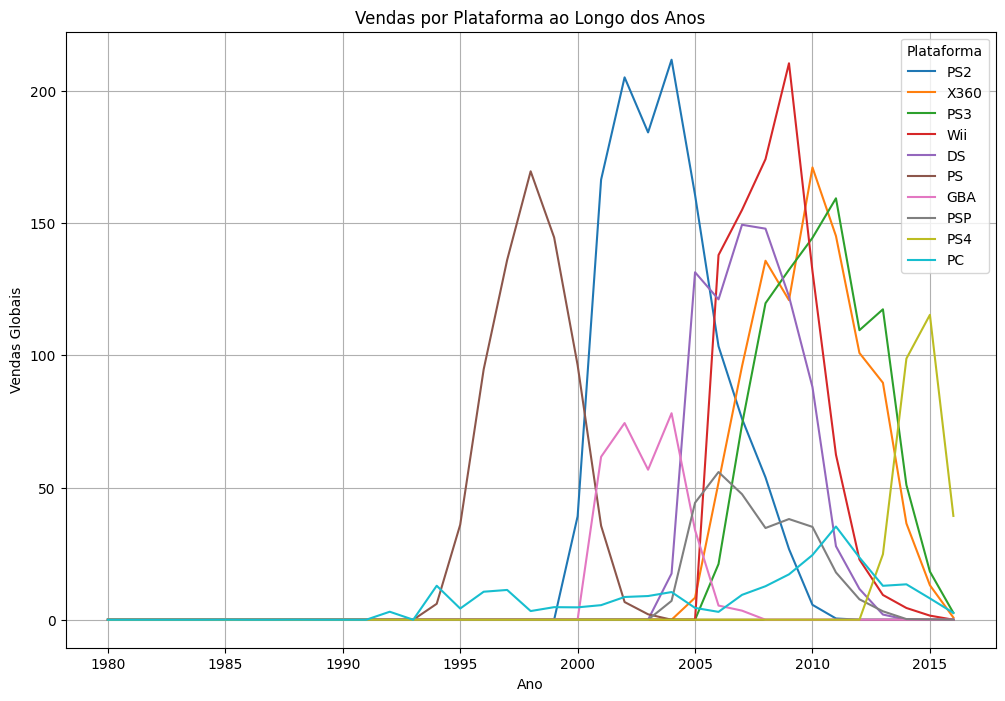

In [6]:
dados = pd.read_csv('vgsales.csv')

vendas_por_ano_plataforma = dados.groupby(['Year', 'Platform'])['Global_Sales'].sum().unstack().fillna(0)
plataformas_populares = vendas_por_ano_plataforma.sum().sort_values(ascending=False).head(10).index
vendas_populares = vendas_por_ano_plataforma[plataformas_populares]

#  gráfico de linhas
plt.figure(figsize=(12, 8))
for plataforma in plataformas_populares:
    plt.plot(vendas_populares.index, vendas_populares[plataforma], label=plataforma)

plt.xlabel('Ano')
plt.ylabel('Vendas Globais')
plt.title('Vendas por Plataforma ao Longo dos Anos')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()

Mostre um gráfico de pizza com o percentual de vendas dos diferentes gêneros de jogos.




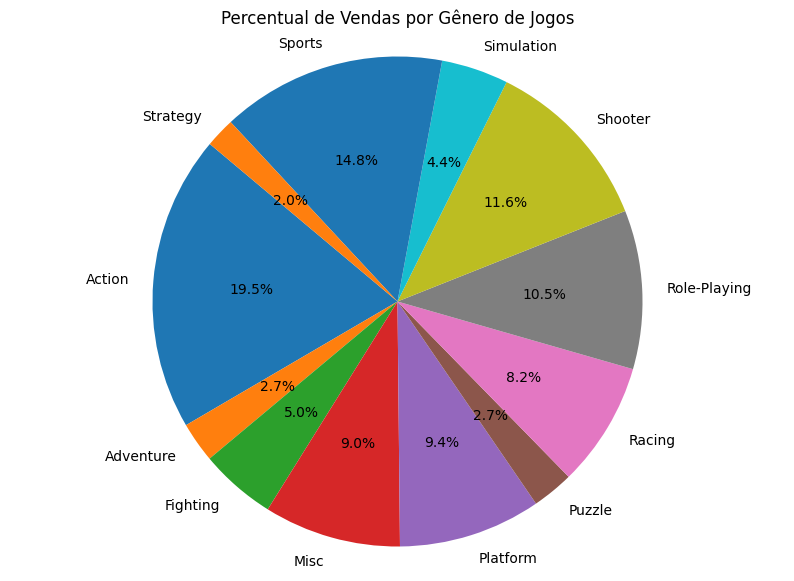

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_csv('vgsales.csv')
vendas_por_genero = dados.groupby('Genre')['Global_Sales'].sum()

#  gráfico de pizza
plt.figure(figsize=(10, 7))
plt.pie(vendas_por_genero, labels=vendas_por_genero.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentual de Vendas por Gênero de Jogos')
plt.axis('equal')  
plt.show()

#Exercícios_pandas

Utilize os arquivos [livros.csv](https://drive.google.com/file/d/1fzuUyFxhzhE9U4_-i3IIUTwvgr3QG1Hj/view?usp=sharing), [livros_genero.csv](https://drive.google.com/file/d/1Cww5lAb7l_LQXVhH1ieyIOWIrqorNKcn/view?usp=sharing) e [livros_classicos.csv](https://drive.google.com/file/d/1pbSReiGSIIlHHXbFBOAaA5zTlNTrbY9P/view?usp=sharing) como entrada para o processamento requerido nos seguintes exercícios.


Faça a concatenação das bases de dados livros.csv e livros_genero.csv e encontre qual o gênero de livro correspondente a cada livro.

In [12]:
import pandas as pd

livros = pd.read_csv('livros.csv', delimiter='\s+', names=['nome', 'paginas'])
livros_genero = pd.read_csv('livros_genero.csv', delimiter='\s+', names=['genero', 'autor'])

# Concatenar as bases de dados usando a coluna 'nome' como chave
livros_completo = pd.concat([livros, livros_genero], axis=1)
print(livros_completo)

# gênero de cada livro
for index, row in livros_completo.iterrows():
    nome_livro = row['nome']
    genero_livro = row['genero']
    print(f"O livro '{nome_livro}' é do gênero '{genero_livro}'")

            nome paginas           genero  autor
0   nome,paginas     NaN     genero,autor    NaN
1          livro   1,257      Drama,Pedro    NaN
2          livro   2,106    Aventura,José    NaN
3          livro   3,150     Drama,Carlos    NaN
4          livro   4,175    Romance,Maria    NaN
5          livro   5,321    Romance,Fabio    NaN
6          livro   6,159   Aventura,Aline    NaN
7          livro   7,980      Drama,Paulo    NaN
8          livro   8,235  Aventura,Sandro    NaN
9          livro   9,745    Romance,Maria    NaN
10         livro  10,126   Aventura,Fabio    NaN
11           NaN     NaN    Romance,Pedro    NaN
O livro 'nome,paginas' é do gênero 'genero,autor'
O livro 'livro' é do gênero 'Drama,Pedro'
O livro 'livro' é do gênero 'Aventura,José'
O livro 'livro' é do gênero 'Drama,Carlos'
O livro 'livro' é do gênero 'Romance,Maria'
O livro 'livro' é do gênero 'Romance,Fabio'
O livro 'livro' é do gênero 'Aventura,Aline'
O livro 'livro' é do gênero 'Drama,Paulo'
O livro '

Faça a concatenação das bases de dados de livros e livros_genero e encontre qual os gêneros e os autores que não possuem um livro correspondente.

In [11]:
import pandas as pd

livros = pd.read_csv('livros.csv', skiprows=1, delimiter=',', names=['nome', 'paginas'])
livros_genero = pd.read_csv('livros_genero.csv', skiprows=1, delimiter=',', names=['genero', 'autor'])

try:

    livros_completo = pd.merge(livros, livros_genero, left_on='nome', right_on='genero', how='outer')
    generos_sem_livro = livros_completo[livros_completo['nome'].isnull()]['genero'].unique()
    autores_sem_livro = livros_completo[livros_completo['nome'].isnull()]['autor'].unique()

    print("Gêneros sem livro correspondente:")
    print(generos_sem_livro)

    print("\nAutores sem livro correspondente:")
    print(autores_sem_livro)

except KeyError as e:
    print(f"Erro de chave ao tentar realizar merge: {e}")

Gêneros sem livro correspondente:
['Aventura' 'Drama' 'Romance']

Autores sem livro correspondente:
['José' 'Aline' 'Sandro' 'Fabio' 'Pedro' 'Carlos' 'Paulo' 'Maria']


Faça a junção das bases de livros e livros clássicos.

In [10]:
import pandas as pd

livros = pd.read_csv('livros.csv', delimiter='\s+', names=['nome', 'paginas'])
livros_classicos = pd.read_csv('livros_classicos.csv', delimiter='\s+', names=['nome', 'classico'])

livros_com_classicos = pd.merge(livros, livros_classicos, on='nome', how='left')

print("Primeiros registros da tabela combinada:")
print(livros_com_classicos.head())

total_classicos = livros_com_classicos['classico'].notnull().sum()
print(f"\nTotal de livros considerados clássicos: {total_classicos}")

Primeiros registros da tabela combinada:
           nome paginas   classico
0  nome,paginas     NaN        NaN
1         livro   1,257    1,Jorge
2         livro   1,257   2,Santos
3         livro   1,257  3,Leandro
4         livro   1,257    4,Clara

Total de livros considerados clássicos: 100


Faça a junção das bases de livros e livros clássicos apenas com os elementos em comum entre ambos e remova os índices dos antigos dataframes.

In [13]:
import pandas as pd


livros = pd.read_csv('livros.csv', delimiter='\s+', names=['nome', 'paginas'])
livros_classicos = pd.read_csv('livros_classicos.csv', delimiter='\s+', names=['nome', 'classico'])

#display(livros)
#display(livros_classicos) 

livros_com_classicos = pd.merge(livros, livros_classicos, on='nome', how='inner')

#remove os indices
livros_com_classicos.reset_index(drop=True, inplace=True)

print("Registros da tabela combinada com elementos em comum:")
print(livros_com_classicos)

Registros da tabela combinada com elementos em comum:
     nome paginas   classico
0   livro   1,257    1,Jorge
1   livro   1,257   2,Santos
2   livro   1,257  3,Leandro
3   livro   1,257    4,Clara
4   livro   1,257   5,Flavia
..    ...     ...        ...
95  livro  10,126  6,Leandro
96  livro  10,126   7,Santos
97  livro  10,126   8,Marcia
98  livro  10,126   9,Marcia
99  livro  10,126   10,Clara

[100 rows x 3 columns]


Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos.

In [14]:
import pandas as pd

livros = pd.read_csv('livros.csv', delimiter='\s+', names=['nome', 'paginas'])
livros_classicos = pd.read_csv('livros_classicos.csv', delimiter='\s+', names=['nome', 'classico'])

#display(livros)
#display(livros_classicos) 

livros_com_classicos = pd.merge(livros, livros_classicos, on='nome', how='inner', suffixes=('_livro', '_classico'))
livros_com_classicos['tipo'] = livros_com_classicos.apply(lambda row: 'Clássico' if pd.notnull(row['classico']) else 'Original', axis=1)

#exibe registros  
print("Registros da tabela combinada com elementos em comum e chaves adicionadas:")
print(livros_com_classicos)

Registros da tabela combinada com elementos em comum e chaves adicionadas:
     nome paginas   classico      tipo
0   livro   1,257    1,Jorge  Clássico
1   livro   1,257   2,Santos  Clássico
2   livro   1,257  3,Leandro  Clássico
3   livro   1,257    4,Clara  Clássico
4   livro   1,257   5,Flavia  Clássico
..    ...     ...        ...       ...
95  livro  10,126  6,Leandro  Clássico
96  livro  10,126   7,Santos  Clássico
97  livro  10,126   8,Marcia  Clássico
98  livro  10,126   9,Marcia  Clássico
99  livro  10,126   10,Clara  Clássico

[100 rows x 4 columns]


Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos, além de nomes para os índices.

In [15]:
import pandas as pd

livros = pd.read_csv('livros.csv', delimiter=',', names=['nome', 'paginas'], header=0)
livros_classicos = pd.read_csv('livros_classicos.csv', delimiter=',', names=['nome', 'classico'], header=0)

livros_com_classicos = pd.merge(livros, livros_classicos, on='nome', how='inner', suffixes=('_livro', '_classico'))

livros_com_classicos.reset_index(drop=True, inplace=True)
livros_com_classicos.index.name = 'indice'

if 'classico' in livros_com_classicos.columns:
    livros_com_classicos.rename(columns={'nome': 'nome_livro', 'classico': 'nome_classico'}, inplace=True)

#exibir  registros 
print(livros_com_classicos)

       nome_livro  paginas nome_classico
indice                                  
0         livro 1      257         Jorge
1         livro 2      106        Santos
2         livro 3      150       Leandro
3         livro 4      175         Clara
4         livro 5      321        Flavia
5         livro 6      159       Leandro
6         livro 7      980        Santos
7         livro 8      235        Marcia
8         livro 9      745        Marcia
9        livro 10      126         Clara


Faça a junção das bases de dados livros e livros_classicos e verifique a integridade do dataframe resultante.

In [16]:
import pandas as pd

livros = pd.read_csv('livros.csv', delimiter=',', names=['nome', 'paginas'], header=0)
livros_classicos = pd.read_csv('livros_classicos.csv', delimiter=',', names=['nome', 'classico'], header=0)
livros_com_classicos = pd.merge(livros, livros_classicos, on='nome', how='inner', suffixes=('_livro', '_classico'))

print("Informações do dataframe combinado:")
print(livros_com_classicos.info())
print("\nPrimeiros registros do dataframe combinado:")
print(livros_com_classicos.head())

Informações do dataframe combinado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   nome      10 non-null     object
 1   paginas   10 non-null     int64 
 2   classico  10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes
None

Primeiros registros do dataframe combinado:
      nome  paginas classico
0  livro 1      257    Jorge
1  livro 2      106   Santos
2  livro 3      150  Leandro
3  livro 4      175    Clara
4  livro 5      321   Flavia
